# Example usage of the BTD class

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import pybbtd.btd as btd
from pybbtd.solvers import btd_als
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Generate BTD model
X = btd.BTD([100, 100, 10], 4, 2, block_mode="LL1")

Sufficient condition for uniqueness satisfied


In [5]:
# create ground truth tensor
np.random.seed(1)
A0, B0, C0 = btd_als.init_BTD_factors(X, strat="random")
theta = X.get_constraint_matrix()
Trec = btd.factors_to_tensor(
    A0, B0, C0, theta, block_mode="LL1"
) + 0 * 1e-10 * np.random.randn(*X.dims)

Reached absolute tolerance threshold. Exiting.


Text(0.5, 0, 'iteration number')

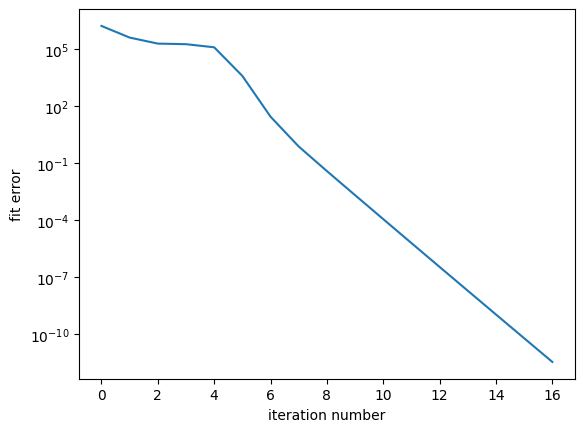

In [6]:
# perform the fit and display the error
X.fit(Trec, abs_tol=1e-14)
rand_init_fit_error = np.copy(X.fit_error)

fig, ax = plt.subplots()
ax.semilogy(X.fit_error)
ax.set_ylabel("fit error")
ax.set_xlabel("iteration number")

Reached absolute tolerance threshold. Exiting.


Text(0.5, 0, 'iteration number')

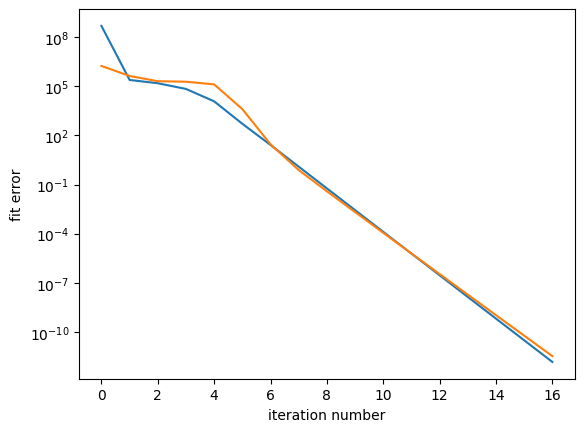

In [7]:
# compare with SVD init

X.fit(Trec, abs_tol=1e-14, init="svd", rel_tol=1e-3)

fig, ax = plt.subplots()
ax.semilogy(X.fit_error)
ax.semilogy(rand_init_fit_error)
ax.set_ylabel("fit error")
ax.set_xlabel("iteration number")